#### Importing Libraries

In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import imblearn.over_sampling
from sklearn.metrics import recall_score
%matplotlib inline

#### Loading Data

In [3]:
#Load data as dataframe
df = pd.read_csv("cleaned_music.csv")

#### Experiment 1: Fixing imbalanced classes after splitting the data

In [4]:
# Split data for Features and Target
X, y = df.drop(['popularity','artist_name','track_name'],axis=1), df['popularity']

In [5]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=3)

In [6]:
# Split data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=3)

#### Handling Class Imbalance

In [7]:
#Data befor over sampling
y_train.value_counts()

0    52778
1    30846
Name: popularity, dtype: int64

In [8]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg} 

In [9]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train, y_train)

C:\Users\96659\anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (61692) in class 1 will be larger than the number of samples in the majority class (class #0 -> 52778)
  warnings.warn(


In [10]:
#Data after over sampling
y_tr_smote.value_counts()

1    61692
0    52778
Name: popularity, dtype: int64

#### Standard Scaling of data 

In [11]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_tr_smote)
X_val_scaled=sc.transform(X_val)

#### Modeling

##### Logistic Regression

In [12]:
lm3 = LogisticRegression()
lm3.fit(X_tr_smote, y_tr_smote)
y_predict = lm3.predict(X_tr_smote)
lm3.score(X_tr_smote, y_tr_smote)

0.6000262077400192

In [13]:
lm3.score(X_val, y_val)

0.5678274179661341

##### KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_tr_smote)
y_pred = knn.predict(X_val_scaled)
print(accuracy_score(y_val, y_pred))

0.7052999139003157


In [15]:
knn.score(X_train_scaled,y_tr_smote)

0.8427360880580065

In [16]:
knn.score(X_val_scaled,y_val)

0.7052999139003157

##### Random Forest

In [17]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_clf.fit(X_tr_smote, y_tr_smote)
print('Accuracy on training set:',rf_clf.score(X_tr_smote,y_tr_smote))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 0.9902856643662095
Accuracy on validation set: 0.7835071271405338


##### Decision Tree

In [18]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_tr_smote, y_tr_smote)
print('Accuracy on training set:',dec_clf.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',dec_clf.score(X_val, y_val))

Accuracy on training set: 1.0
Accuracy on validation set: 0.7124748875920788


##### SVM

In [58]:
from sklearn.svm import SVC
kernel_svm_clf = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_clf.fit(X_tr_smote, y_tr_smote)
print('Accuracy on training set:',kernel_svm_clf.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',kernel_svm_clf.score(X_val,y_val))

Accuracy on training set: 0.7068402201450161
Accuracy on validation set: 0.6779871807136707


### Experiment 2

#### Classification Metrics Functions

In [19]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

#### Featuers Removing

In [20]:
# Keeping the most five important Features
X1, y1 = df.drop(['popularity','artist_name','track_name','liveness','speechiness','beats_per_min', 'mood', 'duration_min'],axis=1), df['popularity']

In [21]:
# Split data into 80% train and 20% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.20, random_state=3)

In [22]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_train1, y_train1, test_size=.2, random_state=3)

#### Handling Class Imbalance 

In [24]:
#Data befor over sampling
y_train1.value_counts()

0    65950
1    38580
Name: popularity, dtype: int64

In [25]:
n_pos = np.sum(y_train1 == 1)
n_neg = np.sum(y_train1 == 0)
ratio = {1 : n_pos * 2, 0 : n_neg}

In [26]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote1, y_tr_smote1 = smote.fit_resample(X_train1, y_train1)

C:\Users\96659\anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (77160) in class 1 will be larger than the number of samples in the majority class (class #0 -> 65950)
  warnings.warn(


#### Results after over sampling

In [27]:
#Data after over sampling
y_tr_smote1.value_counts()

1    77160
0    65950
Name: popularity, dtype: int64

#### Standared Scale for Data

In [29]:
sc = StandardScaler()
X_train_scaled1 = sc.fit_transform(X_tr_smote1)
X_val_scaled1=sc.transform(X1_val)

#### Logistic Regression and KNN

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(C = 1) #large C means no regularization, confusing! (inverse regularization strength)
knn = KNeighborsClassifier(n_neighbors = 10)

lr.fit(X_tr_smote1, y_tr_smote1)
knn.fit(X_tr_smote1, y_tr_smote1)

KNeighborsClassifier(n_neighbors=10)

In [32]:
print('Logistic regression training metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_tr_smote1, lr.predict(X_tr_smote1)),
         precision(y_tr_smote1, lr.predict(X_tr_smote1)),
         recall(y_tr_smote1, lr.predict(X_tr_smote1)),
         F1(y_tr_smote1, lr.predict(X_tr_smote1))
        )
     )

print('\n')

print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y1_val, lr.predict(X1_val)),
         precision(y1_val, lr.predict(X1_val)),
         recall(y1_val, lr.predict(X1_val)),
         F1(y1_val, lr.predict(X1_val))
        )
     )


Logistic regression training metrics: 
 Accuracy: 0.5392 
 Precision: 0.5392 
 Recall: 1.0000 
 F1: 0.7006


Logistic regression validation metrics: 
 Accuracy: 0.3699 
 Precision: 0.3699 
 Recall: 1.0000 
 F1: 0.5401


In [33]:
print('10 nearest neighbors training metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_tr_smote1, knn.predict(X_train_scaled1)),
         precision(y_tr_smote1, knn.predict(X_train_scaled1)),
         recall(y_tr_smote1, knn.predict(X_train_scaled1)),
         F1(y_tr_smote1, knn.predict(X_train_scaled1))
        )
     )

print('\n')

print('10 nearest neighbors validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y1_val, knn.predict(X_val_scaled1)),
         precision(y1_val, knn.predict(X_val_scaled1)),
         recall(y1_val, knn.predict(X_val_scaled1)),
         F1(y1_val, knn.predict(X_val_scaled1))
        )
     )

print('\n')


C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-19-e4f0b3ed0cee>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp / (tp + fp)
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassif

10 nearest neighbors training metrics: 
 Accuracy: 0.4608 
 Precision: nan 
 Recall: 0.0000 
 F1: nan




C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-19-e4f0b3ed0cee>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp / (tp + fp)
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassif

10 nearest neighbors validation metrics: 
 Accuracy: 0.6301 
 Precision: nan 
 Recall: 0.0000 
 F1: nan




<ipython-input-19-e4f0b3ed0cee>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp / (tp + fp)


#### Random Forest and Decision Tree

In [34]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
dec_clf = DecisionTreeClassifier()


rf_clf.fit(X_tr_smote1, y_tr_smote1)
dec_clf.fit(X_tr_smote1, y_tr_smote1)

DecisionTreeClassifier()

In [36]:
print('\n')

print('Random Forest - Training: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_tr_smote1, rf_clf.predict(X_tr_smote1)),
         precision(y_tr_smote1, rf_clf.predict(X_tr_smote1)),
         recall(y_tr_smote1, rf_clf.predict(X_tr_smote1)),
         F1(y_tr_smote1, rf_clf.predict(X_tr_smote1))
        )
     )

print('\n')


print('Random Forest - Validation: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y1_val, rf_clf.predict(X1_val)),
         precision(y1_val, rf_clf.predict(X1_val)),
         recall(y1_val, rf_clf.predict(X1_val)),
         F1(y1_val, rf_clf.predict(X1_val))
        )
     )



Random Forest - Training: 
 Accuracy: 0.9888 
 Precision: 0.9960 
 Recall: 0.9832 
 F1: 0.9895


Random Forest - Validation: 
 Accuracy: 0.9890 
 Precision: 0.9925 
 Recall: 0.9775 
 F1: 0.9850


In [37]:
print('\n')

print('Decision Tree - Training: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_tr_smote1, dec_clf.predict(X_tr_smote1)),
         precision(y_tr_smote1, dec_clf.predict(X_tr_smote1)),
         recall(y_tr_smote1, dec_clf.predict(X_tr_smote1)),
         F1(y_tr_smote1, dec_clf.predict(X_tr_smote1))
        )
     )
print('\n')

print('Decision Tree - Validation: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y1_val, dec_clf.predict(X1_val)),
         precision(y1_val, dec_clf.predict(X1_val)),
         recall(y1_val, dec_clf.predict(X1_val)),
         F1(y1_val, dec_clf.predict(X1_val))
        )
     )



Decision Tree - Training: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000


Decision Tree - Validation: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000


##### Experiment 3

In [40]:
from sklearn import model_selection
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(
    df.drop(['popularity','track_name','artist_name'], axis=1), df.popularity, random_state=123)

#### Ensemble

In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver="lbfgs", random_state=1)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=1)

models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [42]:
import pickle

In [43]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train2, y_train2)
    
    with open(f"C:/Users/96659/Desktop/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [44]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df.drop(['popularity','track_name','artist_name'], axis=1), 
                                                    df.popularity, 
                                                    random_state=123
                                                   )

In [45]:
model_names = ["lr_model", "knn_model", "rf_model", "et_model"]
# Logistic Regression , KNeighbors , Random Forest , Extra Trees

for model_name in model_names:
    with open(f"C:/Users/96659/Desktop/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [46]:
model_list

[('lr_model', LogisticRegression(random_state=1)),
 ('knn_model', KNeighborsClassifier()),
 ('rf_model', RandomForestClassifier(random_state=1)),
 ('et_model', ExtraTreesClassifier(random_state=1))]

In [48]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} train_score: {curr_model.score(X_train3, y_train3)}')
    #print(f'{model_name} val_score: {curr_model.score(X_val3, y_val3)}')
    print(f'{model_name} test_score: {curr_model.score(X_test3, y_test3)}')

lr_model train_score: 0.7046542241089013
lr_model test_score: 0.7036368089144677


C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


knn_model train_score: 0.84160739614478


C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


knn_model test_score: 0.7787914039062022
rf_model train_score: 1.0
rf_model test_score: 0.8117308516500337
et_model train_score: 1.0
et_model test_score: 0.8019653462315558


#### Max Voting
Take the class that has the largest number of predictions for each model.

In [49]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train3, y_train3)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1)

In [50]:
y_pred = voting_classifer.predict(X_train3)
accuracy_score(y_train3, y_pred)

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9089155790483382

In [52]:
accuracy_score(y_test3, voting_classifer.predict(X_test3))

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7993632523112717

#### Stacking
Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier.

In [53]:
from mlxtend.classifier import StackingClassifier
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [54]:
stacked.fit(X_train3, y_train3)

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


StackingClassifier(classifiers=[LogisticRegression(random_state=1),
                                KNeighborsClassifier(),
                                RandomForestClassifier(random_state=1),
                                ExtraTreesClassifier(random_state=1)],
                   meta_classifier=LogisticRegression())

In [55]:
accuracy_score(y_train3, stacked.predict(X_train3))

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0

In [57]:
y_pred = stacked.predict(X_test3)
accuracy_score(y_test3, y_pred)

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8129859793057002

#### Confusion Matrix For the Best Model (Stacking)

In [204]:
from sklearn import metrics 
y_pred=stacked.predict(X_test3)
print(metrics.confusion_matrix(y_test3, y_pred));

C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[18827  1850]
 [ 4259  7730]]


C:\Users\96659\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\96659\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


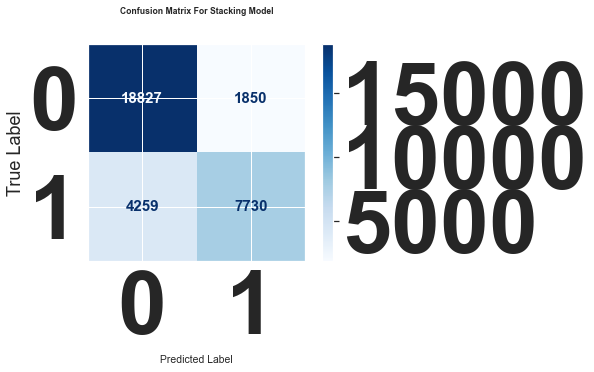

In [244]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
plt.rcParams.update({'font.size':15})
plot_confusion_matrix(stacked, X_test3, y_test3,  cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Stacking Model', fontsize='xx-small',fontweight='bold',pad=30,fontstyle='normal')
plt.xlabel('Predicted Label', fontsize='x-small',fontstyle='normal')
plt.ylabel('True Label', fontsize=18,fontstyle='normal')
plt.show()


#### In this notebook we ran three experiments and fixed the class imbalance issue by using over sampling 
we faced overfitting issues in all three experiments and we will try to reduce the overfitting 